In [ ]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action="ignore")

In [ ]:
#Mount Google Drive
 
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
#Load Data

abi=pd.read_csv('/drive/My Drive/lgm/Iris.csv',encoding="ISO-8859-1")
abi.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#To Print Number of Rows and Columns
abi.shape

(150, 6)

In [ ]:
#To Check whether there is Null Vallues in Every Column
abi.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#To Print DataTypes of Eah Column
abi.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
#To Cluster the Same Datas using SPECIES Column in Dataset
abi.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

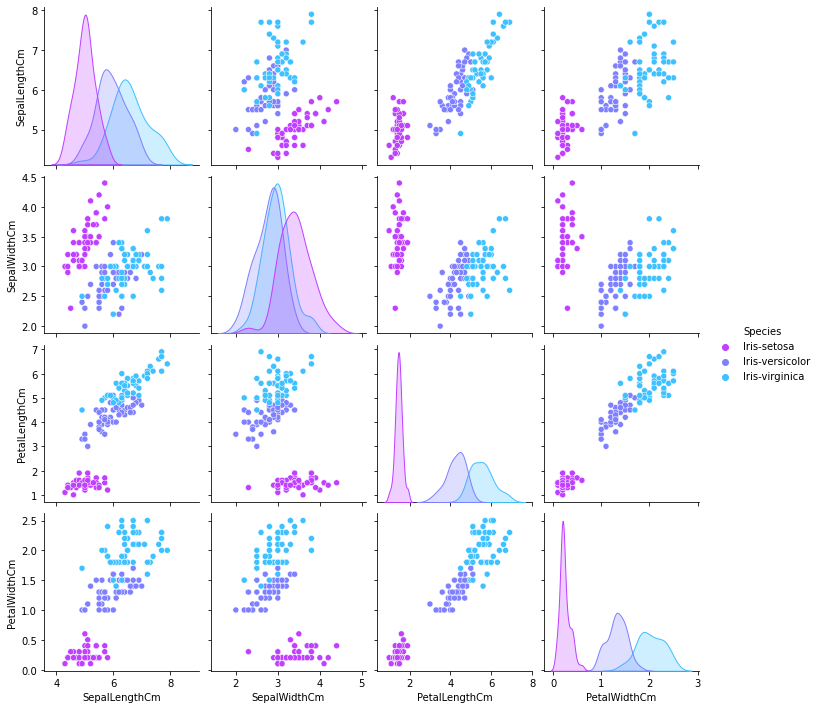

In [ ]:
# Get the Correlation of the Column

sns.pairplot(abi.iloc[:,1:6],hue="Species",palette="cool_r")

In [ ]:
# Get the Correlation of the Column

abi.iloc[:,1:5].corr() #index1 to index 4 (0-1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


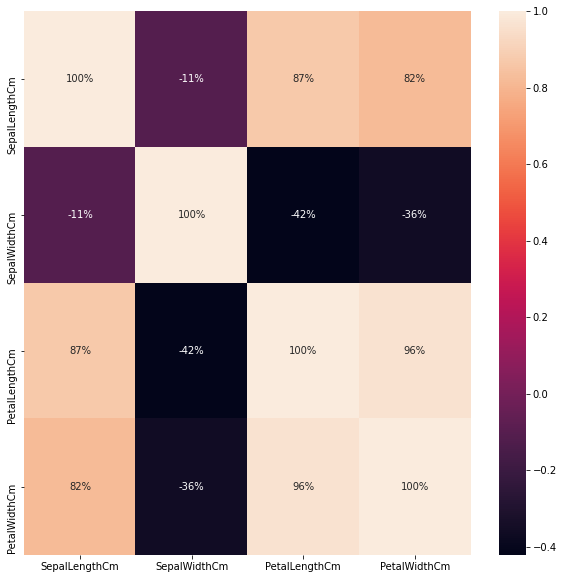

In [ ]:
# Visualize the Correlation
# To Increase the Size of Heatmap Layout
plt.figure(figsize=[10,10])
sns.heatmap(abi.iloc[:,1:5].corr(), annot=True,fmt='.0%')


In [ ]:
#Encode the Categorical Data Value

from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
s=labelencoder_Y.fit_transform(abi.iloc[:,5].values) 

#to Make Changes to the Database Using Encoded Value
abi.iloc[:,5]=s

In [ ]:
abi.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
 #Split the Dataset into Independent (x) & dependent (Y) Data Sets

 X=abi.iloc[:,1:4].values
 Y=abi.iloc[:,5].values

In [ ]:
#Split the Dataset into 75% Training and 25% Testing(1-0.75=0.25)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.25, random_state=12)

In [ ]:
# Scale the Data (Feature Scaling)

from sklearn.preprocessing import StandardScaler
i= StandardScaler()
X_train =i.fit_transform(X_train)
X_test=i.fit_transform(X_test)

In [ ]:
# Create a Function for Models

def models(X_train,Y_train):

  #Logistic Regression

  from sklearn.linear_model import LogisticRegression
  a= LogisticRegression(random_state=0)
  a.fit(X_train,Y_train)

  #K-NN
  from sklearn.neighbors import KNeighborsClassifier  
  d= KNeighborsClassifier(n_neighbors=5)  
  d.fit(X_train,Y_train)

  #Decision Tree
  
  from sklearn.tree import DecisionTreeClassifier
  b= DecisionTreeClassifier(criterion= "entropy", random_state=0)
  b.fit(X_train, Y_train)

  #Random Forest Classifier

  from sklearn.ensemble import RandomForestClassifier
  i= RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
  i.fit(X_train, Y_train)
  
  #Print Model Accuracy on Training Data
  print('[0] Logistic Regression Training Accuracy:', a.score(X_train,Y_train))
  print('[1] K-NN Training Accuracy:',d.score(X_train,Y_train))
  print('[2] Decision Tree Classifier Training Accuracy:',b.score(X_train,Y_train))
  print('[3] Random Forest Classifier Training Accuracy:',i.score(X_train,Y_train))
  
  return a, b, d,i

In [ ]:
#Getting All the Models

model= models(X_train,Y_train)

[0] Logistic Regression Training Accuracy: 0.9553571428571429
[1] K-NN Training Accuracy: 0.9642857142857143
[2] Decision Tree Classifier Training Accuracy: 1.0
[3] Random Forest Classifier Training Accuracy: 0.9910714285714286


In [ ]:
# Confusion Matrix(Easiest Way)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print("Model",i)
  print(classification_report(Y_test,model[i].predict(X_test)))
  print(accuracy_score(Y_test,model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.89      0.67      0.76        12
           2       0.73      1.00      0.85        11

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.86        38
weighted avg       0.89      0.87      0.87        38

0.868421052631579

Model 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.67      0.80        12
           2       0.73      1.00      0.85        11

    accuracy                           0.89        38
   macro avg       0.91      0.89      0.88        38
weighted avg       0.92      0.89      0.89        38

0.8947368421052632

Model 2
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      0.58      0.70        12
           2

Random Forest Classifier(92%) Ranks Tops When Testing Compared to Logistic Regression(86%),K-NN(89%) & Decision Tree(84%)